<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_DM/blob/main/Lab_4_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DM Lab 4: Association Rules - FP-Growth using **mlxtend** API
# 21130429 - Phạm Tiến Lộc


---



# Import libraries

In [57]:
#import libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
# https://www.kaggle.com/code/mervetorkan/association-rules-with-python
# https://www.kaggle.com/code/rjmanoj/fp-growth-algorithm-frequent-itemset-pattern

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/gdrive
/content/gdrive/MyDrive/data


#Task 1. Apply Apriori algorithm to **dataset41** with transactions from 11 items : {JAM, MAGGI, SUGAR, COFFEE, CHEESE, TEA, BOURNVITA, CORNFLAKES, BREAD, BISCUIT, MILK}

#Task 1.1. Prepare dataset (load transactions from **dataset41.csv** and preprocess them)

In [20]:
#code
ds41 = pd.read_csv('dataset41.csv')
transactions = [transaction.replace(',', ' ').split() for transaction in ds41.iloc[:, 0]]
print(transactions)

[['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'], ['BREAD', 'TEA', 'BOURNVITA'], ['JAM', 'MAGGI', 'BREAD', 'MILK'], ['MAGGI', 'TEA', 'BISCUIT'], ['BREAD', 'TEA', 'BOURNVITA'], ['MAGGI', 'TEA', 'CORNFLAKES'], ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'], ['JAM', 'MAGGI', 'BREAD', 'TEA'], ['BREAD', 'MILK'], ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'], ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'], ['COFFEE', 'SUGER', 'BOURNVITA'], ['BREAD', 'COFFEE', 'COCK'], ['BREAD', 'SUGER', 'BISCUIT'], ['COFFEE', 'SUGER', 'CORNFLAKES'], ['BREAD', 'SUGER', 'BOURNVITA'], ['BREAD', 'COFFEE', 'SUGER'], ['BREAD', 'COFFEE', 'SUGER'], ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Task 1.2. Apply FP-Growth to the preprocessed dataset with min_supp = 50% and min_conf = 50%

In [33]:
#code
a = TransactionEncoder()
a_data = a.fit(transactions).transform(transactions)
ds41 = pd.DataFrame(a_data,columns=a.columns_)

fpg = fpgrowth(ds41, min_support=0.2, use_colnames=True)
fpg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.631579,(BREAD)
1,0.315789,(CORNFLAKES)
2,0.315789,(BISCUIT)
3,0.210526,(MILK)
4,0.368421,(TEA)
5,0.210526,(BOURNVITA)
6,0.263158,(MAGGI)
7,0.421053,(COFFEE)
8,0.315789,(SUGER)
9,0.210526,"(COFFEE, CORNFLAKES)"


#Task 1.3. Report association rules obtained from Task 1.2 (include their support, confidence, and lift)

In [34]:
#code
rules = association_rules(fpg, metric = "confidence", min_threshold=0.2)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,0.636364
1,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,0.538462
2,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368,-0.222222
3,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649,-0.142857
4,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298,0.854167
5,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895,0.732143
6,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,0.636364
7,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,0.538462
8,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316,0.142857
9,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263,0.076923


#Task 2. Apply **FP-Growth** algorithm to **dataset42** with transactions related to income

#Task 2.1. Prepare dataset (load transactions from dataset42.csv and preprocess them)

In [65]:
#code
ds42 = pd.read_csv('dataset42.csv')
imputer = SimpleImputer(missing_values="?", strategy='most_frequent')
ds42.iloc[:, :] = imputer.fit_transform(ds42.iloc[:, :])

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
ds42['fnlwgt'] = discretizer.fit_transform(ds42[['fnlwgt']])
ds42['age'] = discretizer.fit_transform(ds42[['age']])
ds42['hours.per.week'] = discretizer.fit_transform(ds42[['hours.per.week']])
ds42

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,4.0,Private,0.0,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,1.0,United-States,<=50K
1,4.0,Private,1.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,0.0,United-States,<=50K
2,4.0,Private,1.0,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,1.0,United-States,<=50K
3,3.0,Private,1.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,1.0,United-States,<=50K
4,2.0,Private,2.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,1.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,Private,2.0,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,1.0,United-States,<=50K
32557,0.0,Private,2.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,1.0,United-States,<=50K
32558,1.0,Private,1.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,1.0,United-States,>50K
32559,3.0,Private,1.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,1.0,United-States,<=50K


#Task 2.2. Apply Apriori to the preprocessed dataset with min_supp = 50% and min_conf = 50% (*modify min_supp and min_conf if proposed values are not appropriate*)

In [69]:
#code


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Task 2.3. Report association rules obtained from Task 2.2 (include their **support**, **confidence**, and **lift**)

In [ ]:
#code

#Task 2.4. Apply FP-Growth with different values of support and plot the running time

In [ ]:
#code

#Task 2.5. Compare the running time between FP-Growth and Apriori (done in Task 2.4 Lab 3) with different support values. Remember using matplotlib/seaborn to plot the running time

In [ ]:
#code

#Task 3. Apply **FP-Growth** to dataset 3 using **mlxtend** API
The dataset contains 435 voting records on 16 different features ranged fromeducation to defense. The main objective of the task is to use association mining to find the combination of attributes has the highest confidence with either republican or democrat

#Task 3.1. Preprocessing dataset, plot the missing rate for each attribute. Then, remove the high missing attributes (?: missing). Other missing values will be imputed by 'y'

*   **Task 3.1, 3.2, 3.3 done in Lab #3**





In [ ]:
#code

#Task 3.2. Convert **Class** attribute to 2 columns based on its values (republican, democrat).

In [ ]:
#code

#Task 3.3. Drop unnecessary columns from the dataset(Class, id)

In [ ]:
#code

#Task 3.4 Apply **FP-Growth** algorithm to the preprocessed dataset with your min_supp and min_conf

In [ ]:
#code

#Task 3.5. Report the rules obtained from the Task 3.4.

In [ ]:
#code

#Task 3.6. Filter all rules X => Y with Y belonging to {**republican**, **democrat**}

In [ ]:
#code

#Task 3.4. Compare the running time between **FP-Growth** and **Apriori** (done in Task 3.4 Lab 3) with different support values with different values of min_supp. Remember using Prettytable and matplotlib/seaborn to plot the running time

**Susgestion: consider the following figure:**
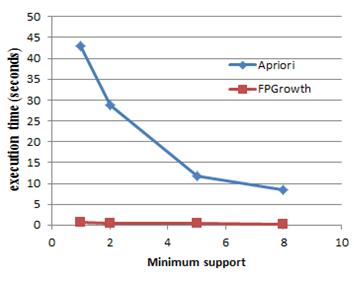

In [ ]:
#code